In [1]:
import copy
import japanize_matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy
from matplotlib.pyplot import imshow
from numpy.random import randn
from scipy import stats
import matplotlib.pyplot as plt

# 問題１

In [2]:
def linear(X, y):
    p = X.shape[1]
    x_bar = np.zeros(p)
    for j in range(p):
        x_bar[j] = np.mean(X[:, j])
    for j in range(p):
        X[:, j] = X[:, j] - x_bar[j]      # Xの中心化
    y_bar = np.mean(y)
    y = y - y_bar                         # yの中心化
    beta = np.dot(                         #(1)
        np.linalg.inv(np.dot(X.T, X)),
        np.dot(X.T, y)
    )
    beta_0 = y_bar - np.dot(x_bar, beta)          #(2)
    return beta, beta_0

# 問題5

Text(0.5, 1.0, '$y = x^2 + x + 2|x|$')

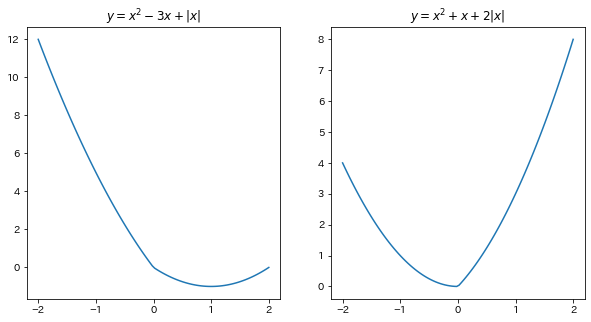

In [3]:
x = np.linspace(-2,2,100)

def f1(x):
    return x**2 - 3*x + np.abs(x)

def f2(x):
    return x**2 + x + np.abs(x)

fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].plot(x,f1(x))
ax[0].set_title('$y = x^2 - 3x + |x|$')
ax[1].plot(x,f2(x))
ax[1].set_title('$y = x^2 + x + 2|x|$')

# 問題7

Text(-2, 1, '$\\lambda=5$')

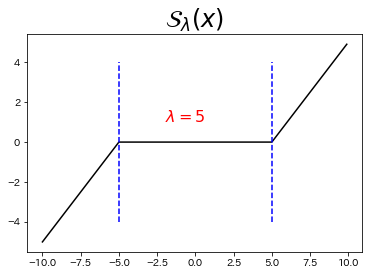

In [4]:
def soft_th(lam, x):
    return np.sign(x)*(np.maximum(np.abs(x)-lam, np.zeros_like(x)))


x = np.arange(-10, 10, 0.1)
y = soft_th(5, x)
plt.plot(x, y, c="black")
plt.title(r"${\cal S}_\lambda(x)$", size=24)
plt.plot([-5, -5], [-4, 4], c="blue", linestyle="dashed")
plt.plot([5, 5], [-4, 4], c="blue", linestyle="dashed")
plt.text(-2, 1, r"$\lambda=5$", c="red", size=16)

# 問題8

lambda = 10の時の係数 [10.47248183 -3.64521939  3.33650908  0.          0.        ]
lambda = 50の時の係数 [ 7.40608466 -0.          2.0596716  -0.         -0.        ]
lambda = 100の時の係数 [ 4.03117071 -0.          0.         -0.         -0.        ]


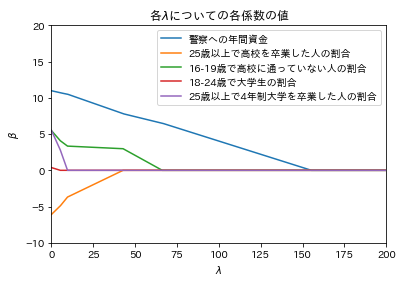

In [5]:
def linear_lasso(X, y, lam=0, beta=None):     #座標降下法によるlasso
    n, p = X.shape  #デザイン行列のサイズ
    if beta is None:
        beta = np.zeros(p)  #学習により求める重み
    X, y, X_bar, X_sd, y_bar = centralize(X, y)   # 中心化
    eps = 1
    beta_old = copy.copy(beta)    #同じポインタを参照しないための工夫
    while eps > 0.00001:    # このループの収束を待つ
        for j in range(p):
            r = y                 #(1)
            for k in range(p):
                if j != k:
                    r = r - X[:, k] * beta[k]
            z = (np.dot(r, X[:, j]) / n) / (np.dot(X[:, j], X[:, j]) / n)
            beta[j] = soft_th(lam, z)
        eps = np.linalg.norm(beta - beta_old, 2) #更新前後での2ノルムの値で収束判定
        beta_old = copy.copy(beta)
    beta = beta / X_sd   # 各変数の係数を正規化前のものに戻す
    beta_0 = y_bar - np.dot(X_bar, beta)  #(2)
    return beta, beta_0

def centralize(X0, y0, standardize=True): #中心化
    X = copy.copy(X0)
    y = copy.copy(y0)
    n, p = X.shape
    X_bar = np.zeros(p)                   # Xの各列の平均
    X_sd = np.zeros(p)                    # Xの各列の標準偏差
    for j in range(p):
        X_bar[j] = np.mean(X[:, j])
        X[:, j] = X[:, j] - X_bar[j]      # Xの各列の中心化
        X_sd[j] = np.std(X[:, j])
        if standardize is True:
            X[:, j] = X[:, j] / X_sd[j]   # Xの各列の標準化
    if np.ndim(y) == 2:
        K = y.shape[1]
        y_bar = np.zeros(K)               # yの平均
        for k in range(K):
            y_bar[k] = np.mean(y[:, k])
            y[:, k] = y[:, k] - y_bar[k]  # yの中心化
    else:                                 # yがベクトルの場合
        y_bar = np.mean(y)
        y = y - y_bar
    return X, y, X_bar, X_sd, y_bar


df = np.loadtxt("../data/crime.txt")
X = df[:,2:]
y = df[:,0]
p = X.shape[1]
y = df[:, 0]
lambda_seq = np.arange(0, 200, 0.1) #0 ~ 199.9の200個生成
plt.xlim(0, 200)
plt.ylim(-10, 20)
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$\beta$")
plt.title(r"各$\lambda$についての各係数の値")
labels = ["警察への年間資金", "25歳以上で高校を卒業した人の割合",
          "16-19歳で高校に通っていない人の割合",
          "18-24歳で大学生の割合", "25歳以上で4年制大学を卒業した人の割合"]
r = len(lambda_seq)
coef_seq = np.zeros((r, p))
for i in range(r):
    coef_seq[i, :], _ = linear_lasso(X, y, lambda_seq[i])
for j in range(p):
    plt.plot(lambda_seq, coef_seq[:, j], label=labels[j])
plt.legend(loc="upper right")

print("lambda = 10の時の係数",coef_seq[100,:])
print("lambda = 50の時の係数",coef_seq[500,:])
print("lambda = 100の時の係数",coef_seq[1000,:])

結果より  
$\lambda = 10$の時は4,5番目の特徴量が0  
$\lambda = 50$の時は2番目の特徴量も0  
$\lambda = 50$の時は1番目の特徴量以外は全て0となる  

# 問題8

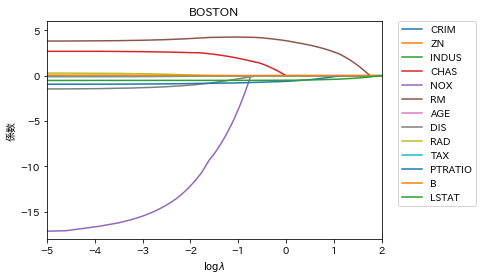

In [6]:
#Boston datasetの読み込み
from sklearn.datasets import load_boston
boston = load_boston()
x = boston.data
y = boston.target
n, p = x.shape
lambda_seq = np.arange(0.0001, 20, 0.01)
r = len(lambda_seq)
plt.xlim(-5, 2)
plt.ylim(-18, 6)
plt.xlabel(r"$\log \lambda$")
plt.ylabel("係数")
plt.title("BOSTON")
labels = boston.feature_names
coef_seq = np.zeros((r, p))
for i in range(r):
    coef_seq[i, :], _ = linear_lasso(x, y, lam=lambda_seq[i])
for j in range(p):
    plt.plot(np.log(lambda_seq), coef_seq[:, j], label = labels[j])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)

# 問題10

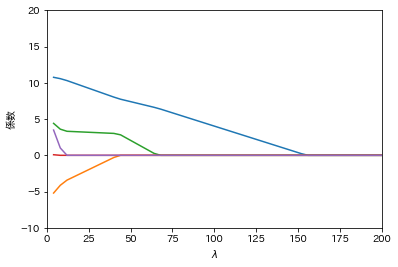

In [7]:
def warm_start(X, y, lambda_max=100):
    dec = np.round(lambda_max / 50)  #降り幅 1~maxを50等分する
    lambda_seq = np.arange(lambda_max, 1, -dec)
    r = len(lambda_seq)
    p = X.shape[1]
    beta = np.zeros(p)
    coef_seq = np.zeros((r, p))
    for k in range(r):
        beta, _ = linear_lasso(X, y, lambda_seq[k], beta)
        coef_seq[k, :] = beta    #k番目のlambdaの値における重み
    return coef_seq

df = np.loadtxt("../data/crime.txt", delimiter="\t")
X = df[:, [i for i in range(2, 7)]]
p = X.shape[1]
y = df[:, 0]
coef_seq = warm_start(X, y, 200)  #返り値が各ラムダにおける重み配列
lambda_max = 200
dec = round(lambda_max / 50)
lambda_seq = np.arange(lambda_max, 1, -dec)
plt.ylim(np.min(coef_seq), np.max(coef_seq))
plt.xlabel(r"$\lambda$")
plt.ylabel("係数")
plt.xlim(0, 200)
plt.ylim(-10, 20)
for j in range(p):
    plt.plot(lambda_seq, coef_seq[:, j])

# 問題13

In [8]:
def ridge(X, y, lam=0):
    n, p = X.shape
    X, y, X_bar, X_sd, y_bar = centralize(X, y)
    beta = np.dot(
        np.linalg.inv(np.dot(X.T, X) + n * lam * np.eye(p)),
        np.dot(X.T, y)
    )
    beta = beta / X_sd
    beta_0 = y_bar - np.dot(X_bar, beta)
    return beta, beta_0

df = np.loadtxt("../data/crime.txt", delimiter="\t")
X = df[:, [i for i in range(2, 7)]]
y = df[:, 0]
linear(X, y)

(array([10.98067026, -6.08852939,  5.4803042 ,  0.37704431,  5.50047122]),
 489.6485969690334)

In [9]:
ridge(X, y)

(array([10.98067026, -6.08852939,  5.4803042 ,  0.37704431,  5.50047122]),
 717.96)

In [10]:
ridge(X, y, 200)

(array([ 0.0563518 , -0.01976397,  0.07786309, -0.0171218 , -0.0070393 ]),
 717.96)

# 問題14

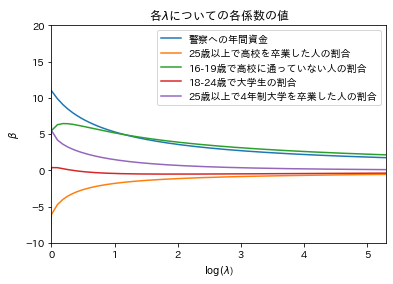

In [11]:
df = np.loadtxt("../data/crime.txt", delimiter="\t")
X = df[:, [i for i in range(2, 7)]]
p = X.shape[1]
y = df[:, 0]
eps = 1e-10 #log(0)を防止するための微小項
lambda_seq = np.log(np.arange(0, 200, 0.1) + eps)
plt.xlim(0, np.log(200))
plt.ylim(-10, 20)
plt.xlabel(r"$\log(\lambda$)")   #横軸の表示を変更
plt.ylabel(r"$\beta$")
plt.title(r"各$\lambda$についての各係数の値")
labels = ["警察への年間資金", "25歳以上で高校を卒業した人の割合",
          "16-19歳で高校に通っていない人の割合",
          "18-24歳で大学生の割合", "25歳以上で4年制大学を卒業した人の割合"]
r = len(lambda_seq)
beta = np.zeros(p)
coef_seq = np.zeros((r, p))
for i in range(r):
    beta, beta_0 = ridge(X, y, lambda_seq[i])
    coef_seq[i, :] = beta
for j in range(p):
    plt.plot(lambda_seq, coef_seq[:, j], label=labels[j])
plt.legend(loc="upper right")

# 問題17

$z_1,z_2 \sim \mathcal{N(0,1)}$  
$x_1,x_2,x_3$は$z_1$にノイズが乗っている  
$x_4,x_5,x_6$は$z_2$にノイズが乗っている  

Text(0.5, 1.0, 'Lasso')

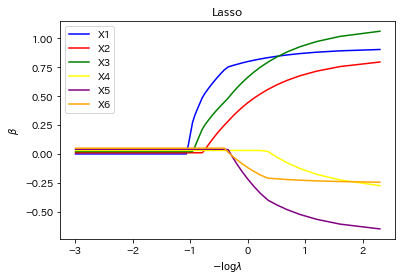

In [12]:
np.random.seed(42)
n = 500
x = np.zeros((n, 6))  #特徴量次元 = 6
z = np.zeros((n, 2))  #これは2で十分
for k in range(2):
    z[:, k] = np.random.randn(n)
y = 3 * z[:, 0] - 1.5 * z[:, 1] + 2 * np.random.randn(n)  #(1)
for j in range(3):
    x[:, j] = z[:, 0] + np.random.randn(n) / 5
for j in range(3, 6):
    x[:, j] = z[:, 1] + np.random.randn(n) / 5
lambda_seq = np.arange(0.1, 20, 0.1)
p = 6
r = len(lambda_seq)
coef_seq = np.zeros((r, p))
cols = ["blue", "red", "green", "yellow", "purple", "orange"]
for i in range(r):
    coef_seq[i, :], _ = linear_lasso(x, y, lambda_seq[i])  #(2)
for j in range(p):
    plt.plot(-np.log(lambda_seq), coef_seq[:, j] + 0.01 * j,
             c=cols[j], label="X"+str(j+1))
plt.xlabel(r"$-\log \lambda$")
plt.ylabel(r"$\beta$")
plt.legend(loc="upper left")
plt.title("Lasso")

# 問題18

In [13]:
def linear_lasso_kai(X, y, lam=0, beta=None, alpha = 1):     #問題8のlinear_lassoの改良版
    n, p = X.shape  #デザイン行列のサイズ
    if beta is None:
        beta = np.zeros(p)  #学習により求める重み
    X, y, X_bar, X_sd, y_bar = centralize(X, y)   # 中心化
    eps = 1
    beta_old = copy.copy(beta)    #同じポインタを参照しないための工夫
    while eps > 0.00001:    # このループの収束を待つ
        for j in range(p):
            r = y                 #(1)
            for k in range(p):
                if j != k:
                    r = r - X[:, k] * beta[k]
            z = (np.dot(r, X[:, j]) / n) / ((np.dot(X[:, j], X[:, j]) / n) + lam*(1-alpha)/np.sqrt((y-y_bar).T@(y-y_bar)/n))
            beta[j] = soft_th(alpha*lam, z)
        eps = np.linalg.norm(beta - beta_old, 2) #更新前後での2ノルムの値で収束判定
        beta_old = copy.copy(beta)
    beta = beta / X_sd   # 各変数の係数を正規化前のものに戻す
    beta_0 = y_bar - np.dot(X_bar, beta)  #(2)
    return beta, beta_0

$\alpha = 1$の時に問題17と同じ挙動を示すかテストする

Text(0.5, 1.0, 'Lasso')

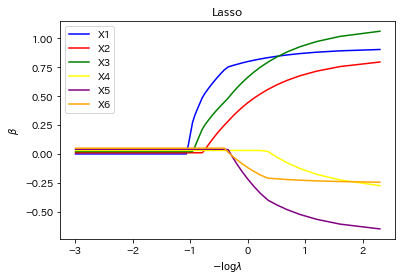

In [14]:
np.random.seed(42)
n = 500
x = np.zeros((n, 6))  #特徴量次元 = 6
z = np.zeros((n, 2))  #これは2で十分
for k in range(2):
    z[:, k] = np.random.randn(n)
y = 3 * z[:, 0] - 1.5 * z[:, 1] + 2 * np.random.randn(n)  #(1)
for j in range(3):
    x[:, j] = z[:, 0] + np.random.randn(n) / 5
for j in range(3, 6):
    x[:, j] = z[:, 1] + np.random.randn(n) / 5
lambda_seq = np.arange(0.1, 20, 0.1)
p = 6
r = len(lambda_seq)
coef_seq = np.zeros((r, p))
cols = ["blue", "red", "green", "yellow", "purple", "orange"]
for i in range(r):
    coef_seq[i, :], _ = linear_lasso_kai(x, y, lambda_seq[i],alpha = 1)  #(2)
for j in range(p):
    plt.plot(-np.log(lambda_seq), coef_seq[:, j] + 0.01 * j,
             c=cols[j], label="X"+str(j+1))
plt.xlabel(r"$-\log \lambda$")
plt.ylabel(r"$\beta$")
plt.legend(loc="upper left")
plt.title("Lasso")

# 問題19

In [15]:
def elastic_net(X, y, lam=0, alpha=1, beta=None):                     #
    n, p = X.shape
    if beta is None:
        beta = np.zeros(p)
    X, y, X_bar, X_sd, y_bar = centralize(X, y)   # 中心化
    eps = 1
    beta_old = copy.copy(beta)
    while eps > 0.00001:    # このループの収束を待つ
        for j in range(p):
            r = y
            for k in range(p):
                if j != k:
                    r = r - X[:, k] * beta[k]
            z = (np.dot(r, X[:, j]) / n)                                    
            beta[j] = (soft_th(lam * alpha, z)                              ##
                       / (np.dot(X[:, j], X[:, j]) / n + (1-alpha) * lam))  ## elastic_netでの変更点
        eps = np.linalg.norm(beta - beta_old, 2)
        beta_old = copy.copy(beta)
    beta = beta / X_sd   # 各変数の係数を正規化前のものに戻す
    beta_0 = y_bar - np.dot(X_bar, beta)
    return beta, beta_0

$\alpha = 1$(lasso回帰)として問題17と同じ挙動を示すかテスト

Text(0.5, 1.0, 'Lasso')

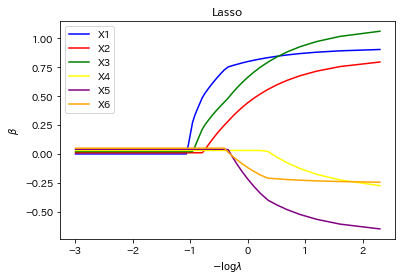

In [16]:
np.random.seed(42)
n = 500
x = np.zeros((n, 6))  #特徴量次元 = 6
z = np.zeros((n, 2))  #これは2で十分
for k in range(2):
    z[:, k] = np.random.randn(n)
y = 3 * z[:, 0] - 1.5 * z[:, 1] + 2 * np.random.randn(n)  #(1)
for j in range(3):
    x[:, j] = z[:, 0] + np.random.randn(n) / 5
for j in range(3, 6):
    x[:, j] = z[:, 1] + np.random.randn(n) / 5
lambda_seq = np.arange(0.1, 20, 0.1)
p = 6
r = len(lambda_seq)
coef_seq = np.zeros((r, p))
cols = ["blue", "red", "green", "yellow", "purple", "orange"]
for i in range(r):
    coef_seq[i, :], _ = elastic_net(x, y, lambda_seq[i],alpha = 1)  #(2)
for j in range(p):
    plt.plot(-np.log(lambda_seq), coef_seq[:, j] + 0.01 * j,
             c=cols[j], label="X"+str(j+1))
plt.xlabel(r"$-\log \lambda$")
plt.ylabel(r"$\beta$")
plt.legend(loc="upper left")
plt.title("Lasso")

# 問題20

In [17]:
def cv_linear_lasso(x, y, alpha=1, k=10, retall = False):  # k-fold
    print(np.dot(x.T,x).shape)
    lam_max = np.max(np.dot(x.T, y) / np.dot(x.T, x))  #最初の非ゼロが現れるlambdaから始める
    lam_seq = np.arange(0, 1, 0.01)*lam_max
    n = len(y)
    m = int(n/k) #一つのバッチサイズ
    r = n%k
    S_min = np.inf
    obj_his = [] #目的関数の更新履歴

    for lam in lam_seq:
        S = 0 #暫定損失関数
        for i in range(k):
            index = range(i*m, i*m + m)                #validation用のデータindex
            _index = list(set(range(n)) - set(index))  #学習用のデータindex
            beta, beta0 = elastic_net(x[_index], y[_index], lam, alpha)
            z = np.linalg.norm((y[index] - beta0 - np.dot(x[index], beta)), 2)
            S = S + z
        obj_his.append(S)
        if S_min > S:
            S_min = S.copy()
            lam_best = lam.copy()
            beta0_best = beta0.copy()
            beta_best = beta.copy()
    
    if retall == True:  #履歴を返す用
        return lam_best, beta0_best, beta_best, S_min ,lam_seq, obj_his
        
    return lam_best, beta0_best, beta_best, S_min 
    
    

cross_validationのテスト

(5, 5)
21.797349629779895
527.046543093802
[ 9.51570956 -3.81437924  2.65954288 -0.          0.        ]


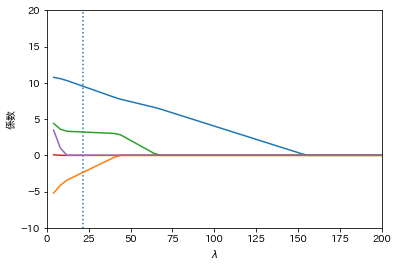

In [18]:
df = np.loadtxt("../data/crime.txt", delimiter="\t")
X = df[:, [i for i in range(2, 7)]]
p = X.shape[1]
y = df[:, 0]
lam, beta0, beta, S = cv_linear_lasso(X, y)
print(lam)
print(beta0)
print(beta)
coef_seq = warm_start(X, y, 200)
lambda_max = 200
dec = round(lambda_max / 50)
lambda_seq = np.arange(lambda_max, 1, -dec)
plt.ylim(np.min(coef_seq), np.max(coef_seq))
plt.xlabel(r"$\lambda$")
plt.ylabel("係数")
plt.xlim(0, 200)
plt.ylim(-10, 20)
plt.axvline(x=lam, ymin=-10, ymax=10, linestyle="dotted")
for j in range(p):
    plt.plot(lambda_seq, coef_seq[:, j])

(5, 5)


Text(0, 0.5, 'sum of loss')

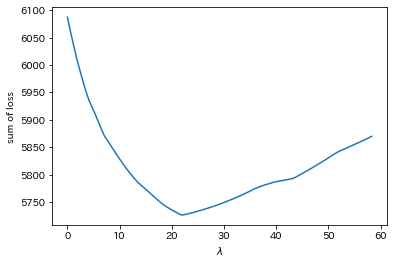

In [19]:
df = np.loadtxt("../data/crime.txt", delimiter="\t")
X = df[:, [i for i in range(2, 7)]]
p = X.shape[1]
y = df[:, 0]
lam, beta0, beta, S, lam_seq, objval = cv_linear_lasso(X, y, retall = True)
coef_seq = warm_start(X, y, 200)
lambda_max = 200
dec = round(lambda_max / 50)
plt.plot(lam_seq, objval)
plt.xlabel(r"$\lambda$")
plt.ylabel("sum of loss")

実際に$\lambda=21$くらいで最小値を取っていることが確認できる